In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
!python --version
!pip install seaborn
!pip install pandas
!pip install scikit-learn

Python 3.9.19
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------ --------------------------------- 1.9/11.0 MB 60.8 MB/s eta 0:00:01
   ------------- -------------------------- 3.8/11.0 MB 49.1 MB/s eta 0:00:01
   ------------------- -------------------- 5.3/11.0 MB 48.9 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.0 MB 41.7 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 42.9 MB/s eta 0:00:01
   ---------------------------------------  10.8/11.0 MB 38.6 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 38.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ---------------------------------------- 301.8/301.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
  

In [8]:
!pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets # import this to load the datasets
from sklearn import svm # import the classification model
from sklearn import model_selection # to load function for train test split
from sklearn import metrics # to evaluate performance of the model
from sklearn import tree
import cv2 as cv
import matplotlib.image as mimg


In [3]:
import matplotlib.image as mimg
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

total_samples = 410
data = np.zeros((total_samples,112*92))
label = np.zeros((total_samples))
images = np.zeros((total_samples,112,92))

index = -1
for i in range(1,42,1):
  for j in range(1,10,1):
    usr_name = i
    samp_no = j
    index = index + 1
    path = "/gdrive/MyDrive/Colab Notebooks/orlfaces/orl_face/u%d/%d.png"%(usr_name,samp_no)

    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    data[index,:] = feat
    label[index] = i
    images[index,:,:] = im



# One-hot encode the labels
label = to_categorical(label)

print(images.shape)


(410, 112, 92)


In [4]:
import matplotlib.image as mimg
import numpy as np
import matplotlib.pyplot as plt
total_samples = 410
data = np.zeros((total_samples,112*92))
label = np.zeros((total_samples))
images = np.zeros((total_samples,112,92))

index = -1
for i in range(1,42,1):
  for j in range(1,11,1):
    usr_name = i
    samp_no = j
    index = index + 1
    path = "/gdrive/MyDrive/Colab Notebooks/orlfaces/orl_face/u%d/%d.png"%(usr_name,samp_no)

    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    data[index,:] = feat
    label[index] = i
    images[index,:,:] = im

print(images.shape)

(410, 112, 92)


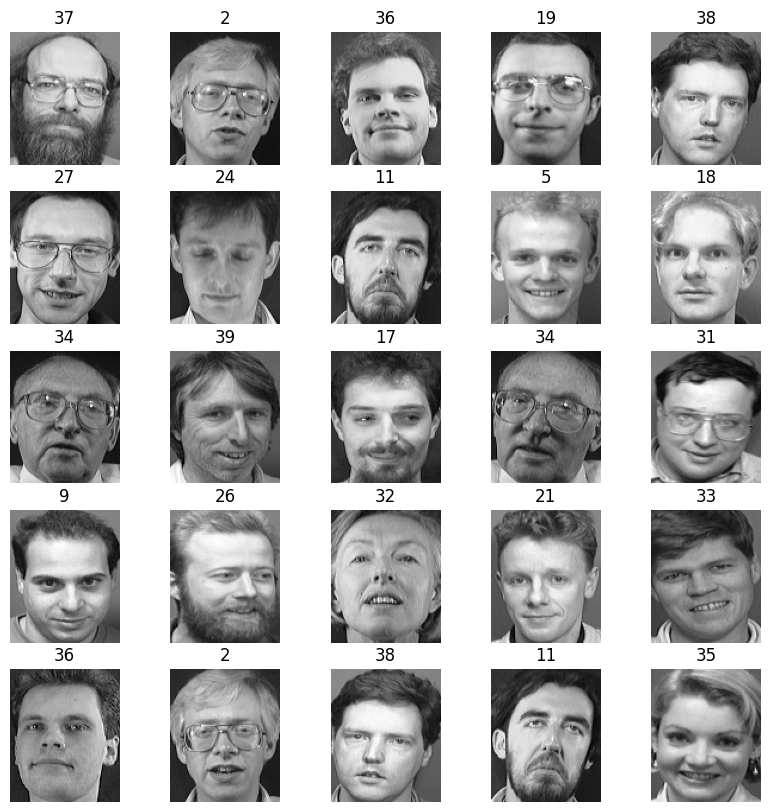

In [ ]:
import numpy as np
# visualise the data images
plt.figure(1,(10,10))
for i in range(5):
  for j in range(5):
    num = np.random.randint(0,410)
    samples_im = images[num,:,:]
    plt.subplot(5,5,(i+j*5)+1)
    plt.imshow(samples_im,cmap='gray')
    plt.title(str(int(label[num])))
    plt.axis('off')

In [ ]:
from sklearn import svm,model_selection,metrics
import numpy as np

x = data
y = label

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=4)

img_model = svm.SVC(kernel="linear", gamma="scale",C=3)
img_model = img_model.fit(xtrain,ytrain)
ypred = img_model.predict(xtest)

accSVM = metrics.accuracy_score(ypred,ytest)
print("Accuracy of SVM Model is:", accSVM)

Accuracy of SVM Model is: 0.975609756097561


In [ ]:
import numpy as np
data = np.zeros((410,112,92))
label = np.zeros(410)
print(data.shape)
count = 0
for i in range(1,42):
  for j in range(1,11):
    path = "/orlfaces/orl_face/u%d/%d.png"%(usr_name,samp_no)
    im = mimg.imread(path)
    data[count,:,:] = im
    label[count] = i
    count+=1

print(data.shape,label.shape)

(410, 112, 92)
(410, 112, 92) (410,)


In [ ]:
from sklearn import model_selection
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(data,label,test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)
xtrain = xtrain/255
xtest = xtest/255

face_model = keras.Sequential()
#input layer
face_model.add(keras.layers.Flatten(input_shape=(xtrain.shape[1],xtrain.shape[2])))

#hidden layers
face_model.add(keras.layers.Dense(128,activation='relu'))
face_model.add(keras.layers.Dense(256,activation='relu'))
face_model.add(keras.layers.Dense(256,activation='relu'))
face_model.add(keras.layers.Dense(512,activation='relu'))

#output layer
face_model.add(keras.layers.Dense(410,activation='relu'))

#add optimizer
face_model.compile(optimizer="SGD", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

print(face_model.summary())

(287, 112, 92) (287,)
(123, 112, 92) (123,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10304)             0         
                                                                 
 dense (Dense)               (None, 128)               1319040   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 dense_4 (Dense)             (None, 410)               210330    
                                                                 
Total params

In [ ]:
#train the model
history = face_model.fit(xtrain, ytrain, epochs=150)

Epoch 1/150
9/9 [==============================] - 1s 18ms/step - loss: 6.0155 - accuracy: 0.0105
Epoch 2/150
9/9 [==============================] - 0s 17ms/step - loss: 6.0136 - accuracy: 0.0348
Epoch 3/150
9/9 [==============================] - 0s 17ms/step - loss: 6.0115 - accuracy: 0.0348
Epoch 4/150
9/9 [==============================] - 0s 18ms/step - loss: 6.0093 - accuracy: 0.0348
Epoch 5/150
9/9 [==============================] - 0s 16ms/step - loss: 6.0070 - accuracy: 0.0348
Epoch 6/150
9/9 [==============================] - 0s 17ms/step - loss: 6.0048 - accuracy: 0.0348
Epoch 7/150
9/9 [==============================] - 0s 19ms/step - loss: 6.0025 - accuracy: 0.0348
Epoch 8/150
9/9 [==============================] - 0s 19ms/step - loss: 6.0002 - accuracy: 0.0348
Epoch 9/150
9/9 [==============================] - 0s 17ms/step - loss: 5.9979 - accuracy: 0.0348
Epoch 10/150
9/9 [==============================] - 0s 17ms/step - loss: 5.9955 - accuracy: 0.0348
Epoch 11/150
9/9 [=

In [ ]:
#evaluate the test data

[loss, accNN] = face_model.evaluate(xtest, ytest)
print(f"Testing Accuracy of Neural Network (NN) is: {accNN}")

4/4 [==============================] - 0s 11ms/step - loss: 4.9672 - accuracy: 0.0000e+00
Testing Accuracy of Neural Network (NN) is: 0.0


In [ ]:
# create the CNN model
cnn_model = keras.models.Sequential() # empty framework
# Convolutinal layer 1
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu',input_shape=(112,92,1)))
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu',input_shape=(112,92,1)))
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu',input_shape=(112,92,1)))
# maxpooling -1
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# Convolutinal layer 2
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu'))
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu'))
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu'))
# maxpooling -2
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# feed forwards network
cnn_model.add(keras.layers.Flatten()) # input layer
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL1
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL2
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL3
cnn_model.add(keras.layers.Dense(410)) # Output layer

# optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='sgd',loss = loss,metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 90, 64)       640       
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 88, 64)       36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 106, 86, 64)       36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 53, 43, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 51, 41, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 49, 39, 64)        36928     
                                                      

In [ ]:
# train the cnn along with the validation data
history = cnn_model.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
9/9 [==============================] - 57s 6s/step - loss: 6.0150 - accuracy: 0.0105 - val_loss: 6.0133 - val_accuracy: 0.0081
Epoch 2/20
9/9 [==============================] - 61s 7s/step - loss: 6.0118 - accuracy: 0.0139 - val_loss: 6.0103 - val_accuracy: 0.0081
Epoch 3/20
9/9 [==============================] - 54s 6s/step - loss: 6.0084 - accuracy: 0.0244 - val_loss: 6.0072 - val_accuracy: 0.0081
Epoch 4/20
9/9 [==============================] - 65s 7s/step - loss: 6.0051 - accuracy: 0.0209 - val_loss: 6.0042 - val_accuracy: 0.0081
Epoch 5/20
9/9 [==============================] - 60s 7s/step - loss: 6.0017 - accuracy: 0.0314 - val_loss: 6.0010 - val_accuracy: 0.0081
Epoch 6/20
9/9 [==============================] - 54s 6s/step - loss: 5.9983 - accuracy: 0.0314 - val_loss: 5.9978 - val_accuracy: 0.0081
Epoch 7/20
9/9 [==============================] - 58s 6s/step - loss: 5.9946 - accuracy: 0.0314 - val_loss: 5.9944 - val_accuracy: 0.0081
Epoch 8/20
9/9 [==================